In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [15]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset


Dataset URL: https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset
License(s): CC0-1.0
 62% 120M/195M [00:00<00:00, 1.24GB/s]
100% 195M/195M [00:00<00:00, 807MB/s] 


In [16]:
!unzip breast-ultrasound-images-dataset.zip


Archive:  breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Data

In [17]:
import os
print(os.listdir("Dataset_BUSI_with_GT"))


['malignant', 'benign', 'normal']


In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [19]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    "Dataset_BUSI_with_GT",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "Dataset_BUSI_with_GT",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)


Found 1263 images belonging to 3 classes.
Found 315 images belonging to 3 classes.


In [20]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [21]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [22]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [23]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 72s 652ms/step - accuracy: 0.6452 - loss: 0.9118 - val_accuracy: 0.8222 - val_loss: 0.4365
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 309ms/step - accuracy: 0.8028 - loss: 0.4481 - val_accuracy: 0.7810 - val_loss: 0.4793
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 307ms/step - accuracy: 0.8299 - loss: 0.3984 - val_accuracy: 0.7968 - val_loss: 0.4495
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 303ms/step - accuracy: 0.7957 - loss: 0.4070 - val_accuracy: 0.8190 - val_loss: 0.4229
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 318ms/step - accuracy: 0.8464 - loss: 0.3818 - val_accuracy: 0.8095 - val_loss: 0.4378
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 307ms/step - accuracy: 0.8384 - loss: 0.3456 - val_accuracy: 0.8159 - val_loss: 0.4155
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 24s 304ms/step - accuracy: 0.8584 - loss: 0.3492 - val_accuracy: 0.8317 - val_loss: 0.4336
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 313ms/step - accuracy: 0.8568 - loss: 0.3201 - val_accu

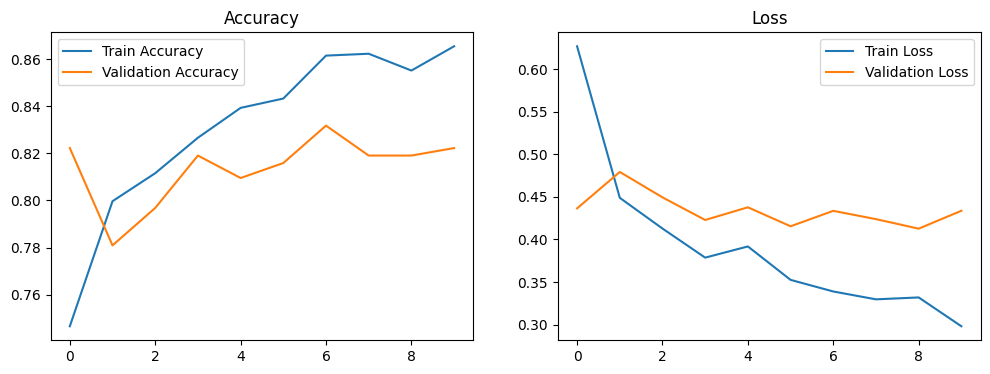

In [24]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()


In [27]:
base_model.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 114s 786ms/step - accuracy: 0.6914 - loss: 1.1420 - val_accuracy: 0.8317 - val_loss: 0.5165
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 333ms/step - accuracy: 0.7419 - loss: 0.7019 - val_accuracy: 0.8286 - val_loss: 0.5288
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 332ms/step - accuracy: 0.7891 - loss: 0.5249 - val_accuracy: 0.8222 - val_loss: 0.5893
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step - accuracy: 0.7890 - loss: 0.5094 - val_accuracy: 0.8413 - val_loss: 0.5378
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 26s 329ms/step - accuracy: 0.8182 - loss: 0.4315 - val_accuracy: 0.8317 - val_loss: 0.5032


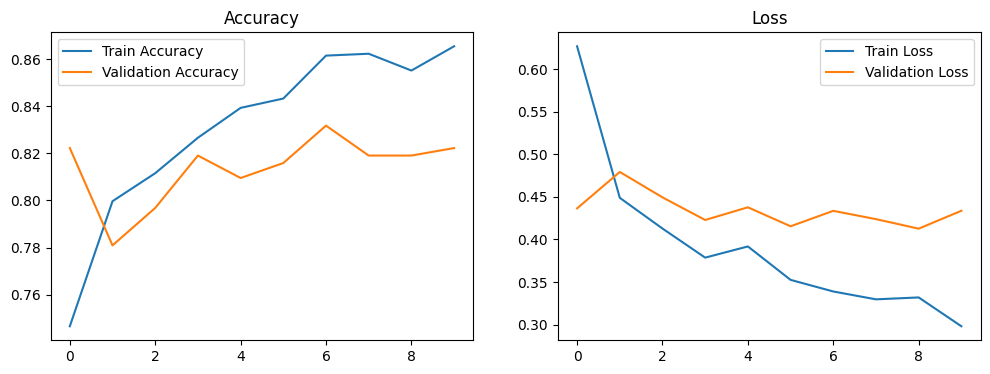

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()


In [28]:
model.save("breast_cancer_transfer_learning_model.h5")


In [30]:
from tensorflow.keras.preprocessing import image

img_path = "Dataset_BUSI_with_GT/benign/benign (1).png"  # change image if needed

img = image.load_img(img_path, target_size=(224,224))
img = image.img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
class_names = list(train_data.class_indices.keys())

print("Predicted Class:", class_names[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Class: benign
